In [66]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [67]:
df = pd.read_csv('ODI-2020.csv', sep=';')
df

,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,When is your birthday (date)?,Number of neighbors sitting around you?,Did you stand up?,What is your stress level (0-100)?,"You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then?",Give a random number,Time you went to be Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
0,Computational Science,no,unknown,mu,ja,female,fat,05-08-1998,0,no,0,4,227,22:30,Good weather,Sporting
1,Quantitative Risk Management,no,0,mu,nee,male,unknown,1996,2,no,85,25,65,23:05,chill,coffee
2,MSc Computational Science,no,0,mu,ja,female,neither,12th June,4,no,50,10,3,10pm,Waking up early and preparing for the day by p...,Using the early morning time to study
3,MSc Finance - QRM,no,0,mu,nee,female,neither,19-06-1994,0,no,10,99,2,23,eating good food,spending time with friends
4,BA,yes,0,mu,ja,male,neither,29-09-1993,0,no,60,80,7,22:00,Sun is shining,Intimate contact with friends and family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Mechenaical Engineering,yes,1,mu,nee,male,fat,17-09-1993,2,no,69,5,6,1:00,no corona,no corona 2
276,CS,no,0,mu,ja,male,fat,28/10,0,no,10,100,7,21:45,Netflix,Chill
277,Artificial Intelligence,yes,1,mu,ja,male,neither,26-07-1994,12,yes,60,75,42,13:37,Finishing all tasks,Finding an extra package of ice cream
278,Artificial Intelligence,no,0,mu,nee,female,neither,3/4/1998,1,no,70,2,69,00:00,Food,Orgasm


In [72]:
# Manual cleaning of the data due to the small size of the dataset

# Analysis of the first column: What programme are you in
df['What programme are you in?'] = [x.lower() for x in df['What programme are you in?']]

# Basic symbol and word replacement
df['What programme are you in?']= df['What programme are you in?'].str.replace('&', 'and', case = False) 
df['What programme are you in?']= df['What programme are you in?'].str.replace('qrm', 'quantitative risk management', case = False)
df['What programme are you in?'] = df['What programme are you in?'].map(lambda x: x.lstrip('').rstrip(' '))
df['What programme are you in?']= df['What programme are you in?'].str.replace('cs', 'business analytics', case = False) 

# Simplifying programme names
df['What programme are you in?'][df['What programme are you in?'].str.contains('quantitative risk management', regex=False)] = 'quantitative risk management'
df['What programme are you in?'][df['What programme are you in?'].str.contains('econometrics', regex=False)] = 'econometrics'
df['What programme are you in?'] = df['What programme are you in?'].str.replace('eor', 'econometrics', case = False)
df['What programme are you in?'][df['What programme are you in?'].str.contains('computer science', regex=False)] = 'computer science'
df['What programme are you in?'][df['What programme are you in?'].str.contains('computational science', regex=False)] = 'computational science'

df['What programme are you in?'][df['What programme are you in?'].str.contains('bioinformatics', regex=False)] = 'bioinformatics'
df['What programme are you in?'][df['What programme are you in?'].str.contains('digital business and innovation', regex=False)] = 'business administration'
df['What programme are you in?'][df['What programme are you in?'].str.contains('econometrics and operations research', regex=False)] = 'econometrics and operations research'
df['What programme are you in?']= df['What programme are you in?'].str.replace('ba', 'business analytics', case = False) 
df['What programme are you in?'][df['What programme are you in?'].str.contains('business analytics', regex=False)] = 'business analytics'
df['What programme are you in?']= df['What programme are you in?'].str.replace('ai', 'artificial intelligence', case = False) 
df['What programme are you in?'][df['What programme are you in?'].str.contains('artificial intelligence', regex=False)] = 'artificial intelligence'
df['What programme are you in?'][df['What programme are you in?'].str.contains('information science', regex=False)] = 'information sciences'
df['What programme are you in?'][df['What programme are you in?'].str.contains('information studies', regex=False)] = 'information studies'
df['What programme are you in?'][df['What programme are you in?'].str.contains('language', regex=False)] = 'human language technology'

# Treating special cases
df['What programme are you in?'][df['What programme are you in?'].str.contains('parallel and distributed computer systems', regex=False)] = 'parallel and distributed computer systems'
df['What programme are you in?']= df['What programme are you in?'].str.replace('exchange', 'erasmus', case = False) 
df['What programme are you in?'][df['What programme are you in?'].str.contains('finance and technology', regex=False)] = 'finance and technology'
df['What programme are you in?']= df['What programme are you in?'].str.replace('cls', 'computational science', case = False) 
df['What programme are you in?']= df['What programme are you in?'].str.replace('cps', 'computational science', case = False) 
df['What programme are you in?'][df['What programme are you in?'].str.contains('master of finance', regex=False)] = 'finance'
df['What programme are you in?'][df['What programme are you in?'].str.contains('movement', regex=False)] = 'human movement sciences'
df['What programme are you in?'][df['What programme are you in?'].str.contains('datascience', regex=False)] = 'data science'
df['What programme are you in?'][df['What programme are you in?'].str.contains('forensic', regex=False)] = 'forensic science'

# Print the final programme list
program = df['What programme are you in?'].unique().tolist()
count = df['What programme are you in?'].value_counts()

In [74]:
# Modify the dataset to yes/no answers
df['Have you taken a course on information retrieval?']= df['Have you taken a course on information retrieval?'].str.replace('1', 'yes', case = False) 
df['Have you taken a course on information retrieval?']= df['Have you taken a course on information retrieval?'].str.replace('0', 'no', case = False) 
df['Have you taken a course on statistics?']= df['Have you taken a course on statistics?'].str.replace('mu', 'yes', case = False) 
df['Have you taken a course on statistics?']= df['Have you taken a course on statistics?'].str.replace('sigma', 'no', case = False) 
df['Have you taken a course on databases?']= df['Have you taken a course on databases?'].str.replace('ja', 'yes', case = False) 
df['Have you taken a course on databases?']= df['Have you taken a course on databases?'].str.replace('nee', 'no', case = False) 

# Select the categorical columns
# To add later:
# 'What programme are you in?','What is your stress level (0-100)?'
df2 = df[['What programme are you in?','Have you taken a course on machine learning?','Have you taken a course on information retrieval?','Have you taken a course on statistics?','Have you taken a course on databases?','What is your gender?']]


In [75]:
# Only use the students that have answers all questions with yes/no
df2 = df2.replace('unknown',np.NaN)
df2 = df2.dropna()
df2

,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?
1,quantitative risk management,no,no,yes,no,male
2,computational science,no,no,yes,yes,female
3,quantitative risk management,no,no,yes,no,female
4,business analytics,yes,no,yes,yes,male
5,business analytics,yes,yes,yes,yes,male
...,...,...,...,...,...,...
275,artificial intelligence,yes,yes,yes,no,male
276,business analytics,no,no,yes,yes,male
277,artificial intelligence,yes,yes,yes,yes,male
278,artificial intelligence,no,no,yes,no,female


In [76]:
df3 = df2.drop(['What programme are you in?'], axis=1)
df4 = pd.get_dummies(df3, drop_first=True)
df4

,Have you taken a course on machine learning?_yes,Have you taken a course on information retrieval?_yes,Have you taken a course on statistics?_yes,Have you taken a course on databases?_yes,What is your gender?_male
1,0,0,1,0,1
2,0,0,1,1,0
3,0,0,1,0,0
4,1,0,1,1,1
5,1,1,1,1,1
...,...,...,...,...,...
275,1,1,1,0,1
276,0,0,1,1,1
277,1,1,1,1,1
278,0,0,1,0,0


In [77]:
# Split the data into test and train
y = df2['What programme are you in?'] # define the target variable (dependent variable) as y
X_train, X_test, y_train, y_test = train_test_split(df4, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(198, 5)
(198,)
(50, 5)
(50,)


In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [86]:
y_pred = classifier.predict(X_test)
y_pred

array(['artificial intelligence', 'artificial intelligence',
       'artificial intelligence', 'business analytics',
       'artificial intelligence', 'artificial intelligence',
       'artificial intelligence', 'artificial intelligence',
       'artificial intelligence', 'business analytics',
       'computational science', 'artificial intelligence',
       'business administration', 'business analytics',
       'business analytics', 'artificial intelligence',
       'artificial intelligence', 'artificial intelligence',
       'artificial intelligence', 'computational science',
       'business analytics', 'artificial intelligence',
       'business analytics', 'artificial intelligence',
       'artificial intelligence', 'artificial intelligence',
       'business analytics', 'artificial intelligence',
       'artificial intelligence', 'artificial intelligence',
       'business analytics', 'artificial intelligence',
       'business analytics', 'computational science',
       'busine

In [87]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6  0  1  1  0  0  0]
 [ 1  1  0  0  0  0  0]
 [10  1  9  1  0  0  0]
 [ 3  0  2  0  0  0  0]
 [ 4  0  4  0  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 2  0  2  1  0  0  0]]
                              precision    recall  f1-score   support

     artificial intelligence       0.22      0.75      0.34         8
     business administration       0.50      0.50      0.50         2
          business analytics       0.50      0.43      0.46        21
       computational science       0.00      0.00      0.00         5
            computer science       0.00      0.00      0.00         8
                     erasmus       0.00      0.00      0.00         1
quantitative risk management       0.00      0.00      0.00         5

                    accuracy                           0.32        50
                   macro avg       0.17      0.24      0.19        50
                weighted avg       0.27      0.32      0.27        50



C:\Users\Gebruiker\Programs\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

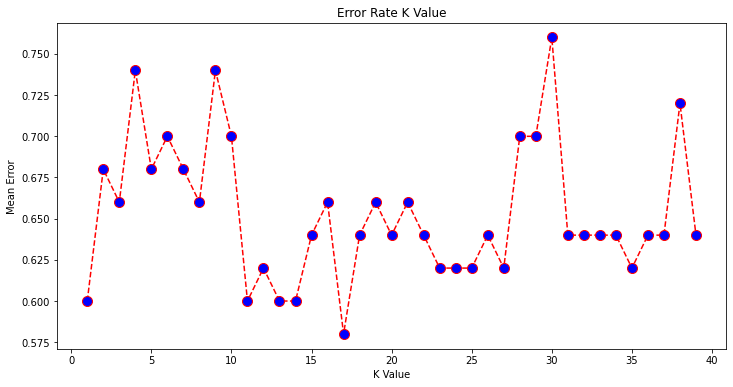

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [78]:
# fit a linear regression model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions

ValueError: could not convert string to float: 'artificial intelligence'

In [81]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 50 points : 47
